### Mnist データセット：

- ニュローンネットワーク　仕組み理解

- torch.nn.functionalについて学習

- nn.Moduleモジュール学習


In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [3]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

784是mnist数据集每个样本的像素点个数

(50000, 784)


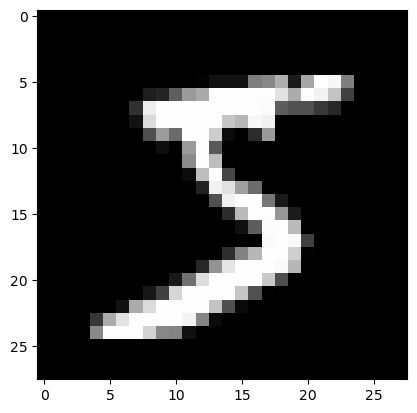

In [4]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

<img src="./img/4.png" alt="FAO" width="790">

<img src=".img/5.png" alt="FAO" width="790">

データセットをTensorを切り替えからモデリングが立ち上げられる


In [5]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


### torch.nn.functional 很多层和函数在这里都会见到

torch.nn.functional中有很多功能，后续会常用的。那什么时候使用nn.Module，什么时候使用nn.functional呢？一般情况下，如果模型有可学习的参数，最好用nn.Module，其他情况nn.functional相对更简单一些

In [6]:
import torch.nn.functional as F

loss_func = F.cross_entropy

def model(xb):
    return xb.mm(weights) + bias

In [7]:
bs = 64   # batch size
xb = x_train[0:bs]  #  64サンプル データ
yb = y_train[0:bs]  #  64サンプル label
weights = torch.randn([784, 10], dtype = torch.float,  requires_grad = True)  # ランダムで　weight 初期化パラメータ28 * 28 = 784個 weight生成 
bs = 64
bias = torch.zeros(10, requires_grad=True)

print(loss_func(model(xb), yb))

tensor(13.1396, grad_fn=<NllLossBackward0>)


### 创建一个model来更简化代码

In [8]:
from torch import nn

class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 256)
        self.out  = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.out(x)
        return x
        

In [9]:
net = Mnist_NN()
print(net)


Mnist_NN(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
)


In [10]:
for name, parameter in net.named_parameters():
    print(name, parameter,parameter.size())

hidden1.weight Parameter containing:
tensor([[-0.0130,  0.0304,  0.0006,  ...,  0.0244, -0.0337,  0.0062],
        [ 0.0024, -0.0222, -0.0252,  ...,  0.0004,  0.0063, -0.0030],
        [-0.0231, -0.0187, -0.0322,  ..., -0.0043,  0.0310, -0.0186],
        ...,
        [-0.0193,  0.0300,  0.0054,  ...,  0.0241, -0.0084,  0.0355],
        [ 0.0335, -0.0145,  0.0065,  ..., -0.0318, -0.0079, -0.0300],
        [-0.0347, -0.0315,  0.0265,  ..., -0.0349, -0.0106,  0.0268]],
       requires_grad=True) torch.Size([128, 784])
hidden1.bias Parameter containing:
tensor([ 1.9447e-02,  1.2705e-02,  1.5845e-02,  2.2677e-02, -1.7735e-02,
        -3.2554e-03, -3.1143e-02, -2.1092e-02, -4.2345e-03, -3.4187e-02,
        -3.2269e-02, -3.2949e-02,  2.5387e-02, -5.7832e-03,  1.5954e-02,
         8.1335e-03,  3.4432e-02, -1.4445e-02, -3.3793e-02, -1.3078e-02,
        -5.4396e-03, -2.8334e-02,  1.8980e-02,  6.0189e-03, -9.1265e-03,
        -2.7135e-02,  3.0051e-02, -1.0267e-02,  3.3394e-02, -1.7965e-02,
      

In [11]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

In [12]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

- 一般在训练模型时加上model.train()，这样会正常使用Batch Normalization和 Dropout
- 测试的时候一般选择model.eval()，这样就不会使用Batch Normalization和 Dropout

In [13]:
import numpy as np

def fit(steps, model, loss_func, opt, train_dl, valid_dl):
    for step in range(steps):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        print('current step:'+str(step), 'validata loss：'+str(val_loss))

In [14]:
from torch import optim
def get_model():
    model = Mnist_NN()
    return model, optim.SGD(model.parameters(), lr=0.001)

In [15]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

In [16]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(25, model, loss_func, opt, train_dl, valid_dl)

current step:0 validata loss：2.274876287841797
current step:1 validata loss：2.2351714584350586
current step:2 validata loss：2.1751660999298097
current step:3 validata loss：2.0794612018585203
current step:4 validata loss：1.9270769945144652
current step:5 validata loss：1.7027241640090942
current step:6 validata loss：1.4318950012207032
current step:7 validata loss：1.18191669921875
current step:8 validata loss：0.9887339405059814
current step:9 validata loss：0.8478249402046204
current step:10 validata loss：0.7460589282035828
current step:11 validata loss：0.670367594909668
current step:12 validata loss：0.6121180950164795
current step:13 validata loss：0.5675029455184937
current step:14 validata loss：0.5324508429527283
current step:15 validata loss：0.5044784235477447
current step:16 validata loss：0.4811060421943665
current step:17 validata loss：0.46241131772995
current step:18 validata loss：0.44589494609832764
current step:19 validata loss：0.43183315949440004
current step:20 validata loss：0.42